In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.spatial.distance import cdist
from IPython.display import display, Math

In [2]:
def generatePopulation(n, a, b):
    return a + np.random.rand(n) * abs(a-b)

generatePopulation(5, 1, 3)

array([1.04950821, 1.49065279, 1.21522285, 2.53924768, 2.65689714])

In [3]:
def dist1D(p):
    dist = 0
    for k in p:
        for l in p:
            new_dist = abs(k-l)
            if new_dist > dist:
                dist = new_dist
    
    return dist

In [4]:
f = lambda x: np.power(x - 1, 2)*np.sin(10*x)/x
f(3)

-1.3173754987904824

In [5]:
n = 10
a, b = -3, 3
max_iter = 100
eps = 1e-3
delta = 1e-5

Pt = generatePopulation(n, a, b)
Ft = f(Pt)

In [6]:
hi = lambda n : norm(0, (b-a)/10).rvs(size=n)
hi(2)

array([-1.21025377,  0.86388035])

In [7]:
t = 0
#S2
Pt = generatePopulation(n, a, b)
while True:
    #S3
    Ft = f(Pt)
    
    if t == max_iter or dist1D(Pt) < eps or dist1D(Ft) < delta:
        print("t = ", t)
        print("min equal to {:.2f} in the point {:.2f}".format(Ft[0],Pt[0]))
        x_min = Pt[0]
        break
    
    #S4
    Pz = Pt + hi(n)
    Pz = np.array([xz + b - a if xz < a else xz + a - b if xz > b else xz for xz in Pz])
    Fz = f(Pz)
    #S5
    Ps = (np.random.choice(Pt, size=n) + np.random.choice(Pt, size=n))/2
    Fs = f(Ps)
    #S6
    P = np.concatenate((Pt, Pz, Ps))
    F = np.concatenate((Ft, Fz, Fs))
    #S7
    sorted_index = np.argsort(F)
    #Pt = P[sorted_index[:n]] #min
    Pt = P[sorted_index[-n:]] #max
    t += 1
    


t =  9
min equal to 10.58 in the point -0.06


In [8]:
def plot(f, a, b, x_min=None, delta=0.01):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot()

    x = np.arange(a, b, (b-a)*delta)

    ax.plot(x, f(x), label='$f(x)$')
    if(x_min != None):
        f_min = f(x_min)
        ax.plot([x_min],[f_min], 'r*', label=r'$f(x) = min $')
        display(Math(r'x^*={},\\ f(x^*)={}'.format(x_min, f(x_min))))

    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend()
    plt.grid()

<IPython.core.display.Math object>

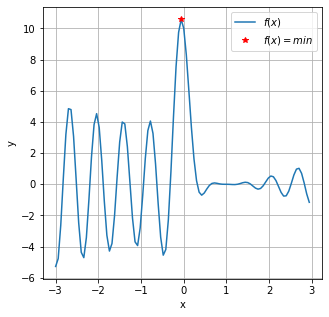

In [9]:
plot(f, a, b, x_min)